In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('/content/city_day.csv')

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 8.4 MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.isna().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [ ]:
#replacing null values with 0
df=df.fillna(0)

In [ ]:
# Extract the day, month, and year into separate columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,Ahmedabad,2015-01-01,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,133.36,0.00,0.02,0.00,0.0,0,1,2015
1,Ahmedabad,2015-01-02,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,34.06,3.68,5.50,3.77,0.0,0,1,2015
2,Ahmedabad,2015-01-03,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,30.70,6.80,16.40,2.25,0.0,0,1,2015
3,Ahmedabad,2015-01-04,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,36.08,4.43,10.14,1.00,0.0,0,1,2015
4,Ahmedabad,2015-01-05,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,39.31,7.01,18.89,2.78,0.0,0,1,2015


In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,6,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,6,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,6,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,6,2020
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,0.00,0.00,0.00,50.0,Good,7,2020


## Performing EDA

In [ ]:
df.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
count,29531,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531,29531.000000,29531.000000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,Ahmedabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate,NaN,NaN
freq,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829,NaN,NaN
mean,NaN,2018-05-14 05:40:15.807118080,56.948470,73.565932,15.442981,25.093456,27.730420,15.270502,2.091818,12.635454,29.793840,2.656135,6.331783,1.187464,140.077207,NaN,6.267143,2017.887914
min,NaN,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,2015.000000
25%,NaN,2017-04-16 00:00:00,18.390000,0.000000,3.670000,9.100000,6.530000,0.000000,0.400000,4.240000,12.795000,0.000000,0.000000,0.000000,61.000000,NaN,3.000000,2017.000000
50%,NaN,2018-08-05 00:00:00,40.890000,49.000000,8.690000,18.580000,19.700000,7.910000,0.840000,7.930000,27.060000,0.470000,1.090000,0.000000,103.000000,NaN,6.000000,2018.000000
75%,NaN,2019-09-03 00:00:00,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,0.430000,179.000000,NaN,9.000000,2019.000000
max,NaN,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,NaN,12.000000,2020.000000


## Distributions of Air_gases

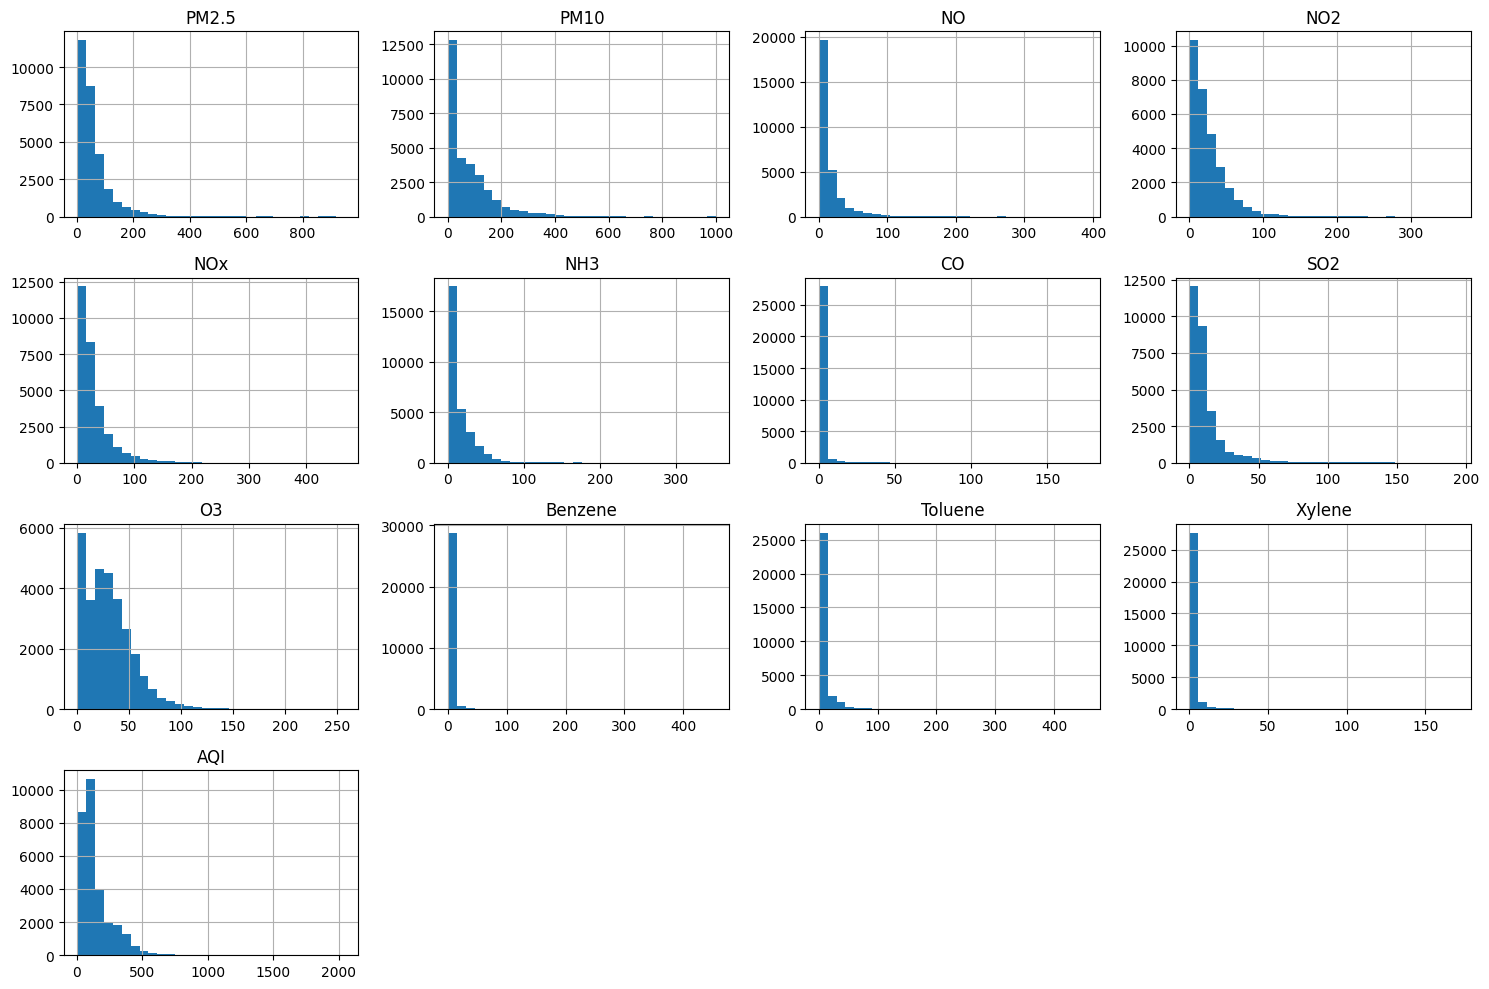

In [ ]:
import matplotlib.pyplot as plt

# List of numeric columns
Air_Distribution = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

# Plot histograms
df[Air_Distribution].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

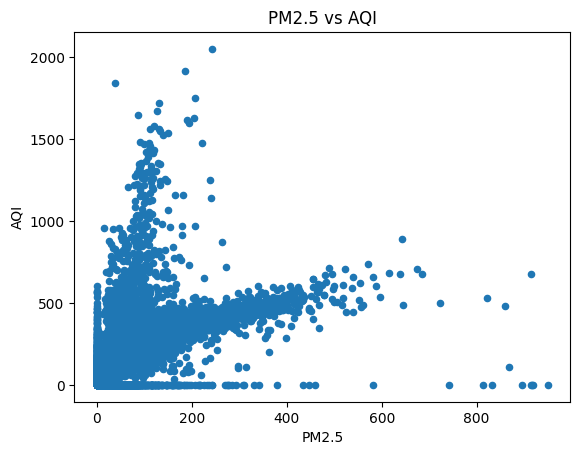

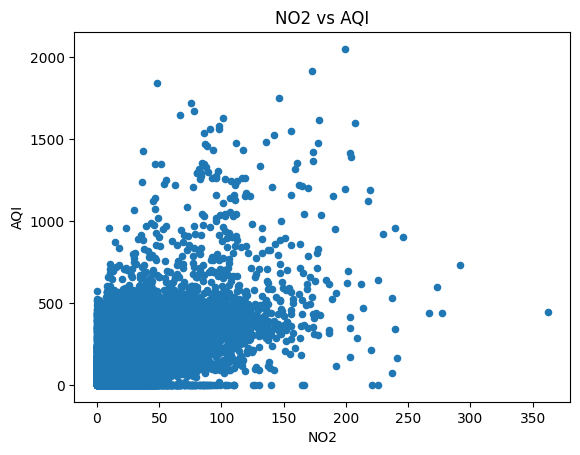

In [ ]:
# Scatter plot between PM2.5 and AQI
df.plot.scatter(x='PM2.5', y='AQI')
plt.title('PM2.5 vs AQI')
plt.show()

# Scatter plot between NO2 and AQI
df.plot.scatter(x='NO2', y='AQI')
plt.title('NO2 vs AQI')
plt.show()

In [ ]:
df.AQI_Bucket.value_counts()

,count
AQI_Bucket,
Moderate,8829
Satisfactory,8224
0,4681
Poor,2781
Very Poor,2337
Good,1341
Severe,1338


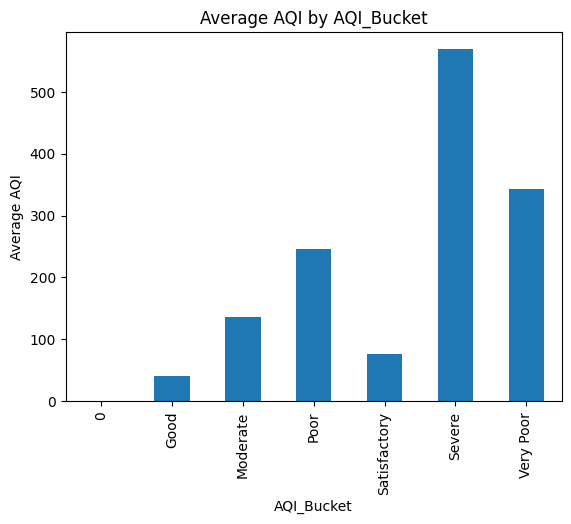

In [ ]:
# Bar chart for AQI_Bucket vs average AQI
df.groupby('AQI_Bucket')['AQI'].mean().plot(kind='bar')
plt.title('Average AQI by AQI_Bucket')
plt.ylabel('Average AQI')
plt.show()

## Year Wise Average AQI

In [ ]:
df['Year'] = df['Date'].dt.year
average_aqi_per_year = df.groupby('Year')['AQI'].mean().reset_index()
average_aqi_per_year

,Year,AQI
0,2015,138.582649
1,2016,145.850201
2,2017,125.161655
3,2018,161.595580
4,2019,148.635509
5,2020,108.023031


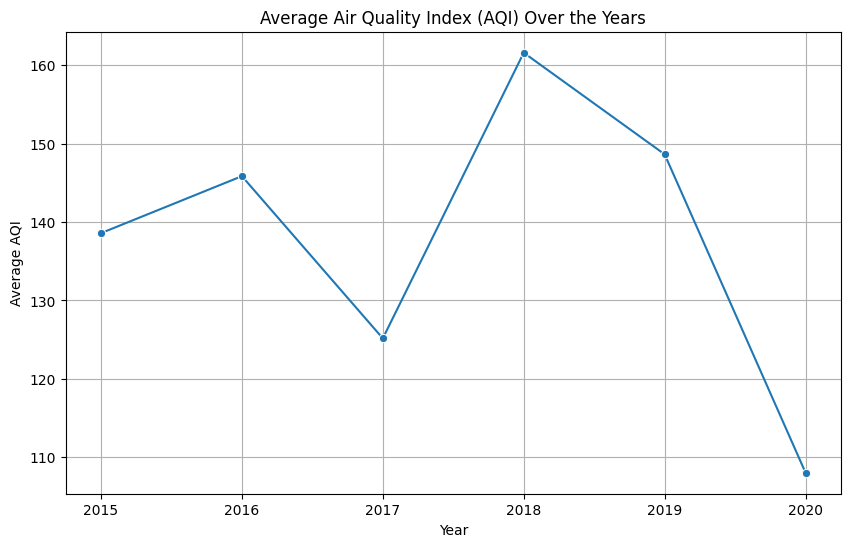

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_aqi_per_year, x='Year', y='AQI', marker='o')
plt.title('Average Air Quality Index (AQI) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the average level of each pollutant per city
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
average_pollutants_per_city = df.groupby('City')[pollutants].mean().reset_index()
average_pollutants_per_city

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,46.643634,23.213390,15.629283,41.162130,33.361951,0.000000,15.465789,37.651747,25.804759,4.112230,21.071200,3.224848
1,Aizawl,16.826814,23.146195,9.408053,0.388496,12.610354,22.308938,0.283628,7.378053,3.412389,8.507168,8.887080,0.000000
2,Amaravati,35.429769,71.945710,4.179516,20.893239,14.490904,11.295152,0.563859,13.283796,35.910757,0.503323,1.729558,0.703954
3,Amritsar,49.653473,109.258485,17.301474,17.854652,27.210655,13.881065,0.516986,7.027690,20.304881,3.514357,2.509083,6.072817
4,Bengaluru,33.216695,68.326620,9.381035,27.911434,19.677835,19.756486,1.828566,5.502539,30.512185,2.795874,4.533161,0.000000
5,Bhopal,48.500623,115.608339,6.818062,30.369170,21.730484,18.478131,0.852976,12.657958,57.987163,0.000000,0.000000,0.000000
6,Brajrajnagar,51.423646,101.307345,12.819574,12.399211,19.963795,27.824072,1.510704,7.770256,13.007196,3.949424,0.000000,0.000000
7,Chandigarh,39.100789,85.656546,10.363257,11.458289,14.860526,29.764737,0.631349,10.159375,20.047204,5.065724,1.398750,2.623059
8,Chennai,47.488930,9.445490,9.025874,16.555545,17.351344,48.860722,1.054067,7.736028,31.652504,1.466735,2.268785,0.000000
9,Coimbatore,28.547409,37.293342,6.325984,27.964249,30.566969,6.529197,0.941943,8.535026,28.609378,0.009067,0.038808,0.000000


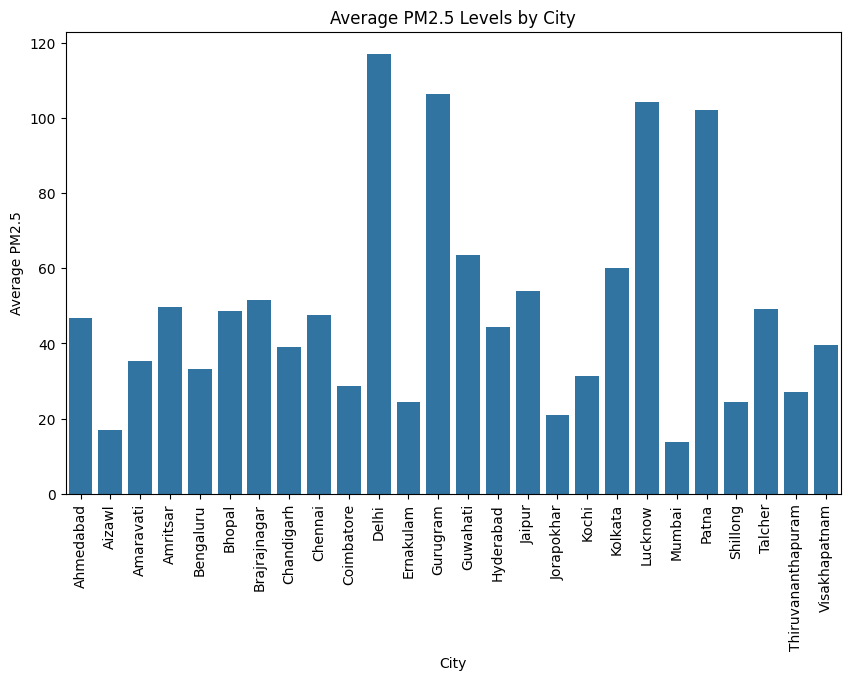

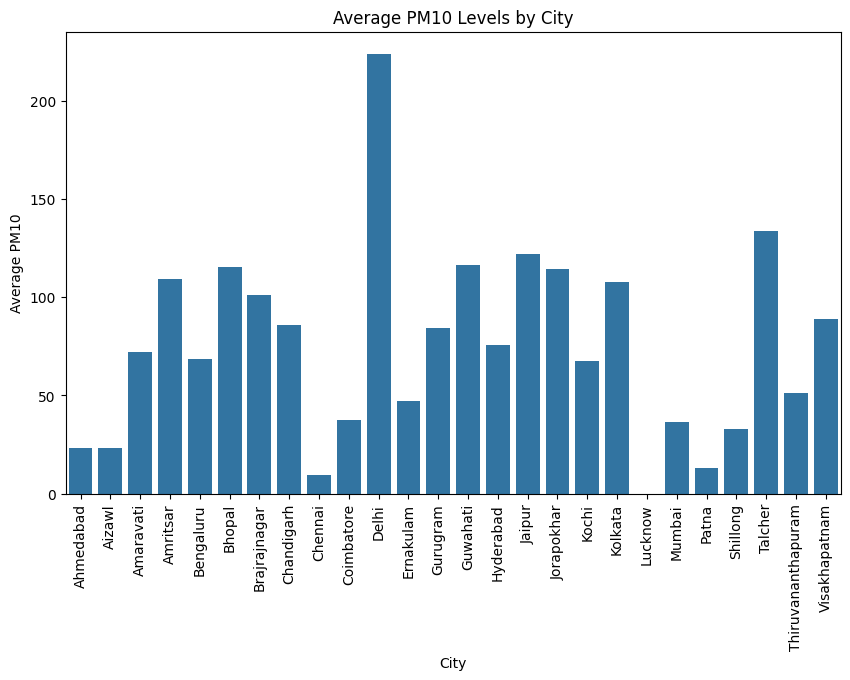

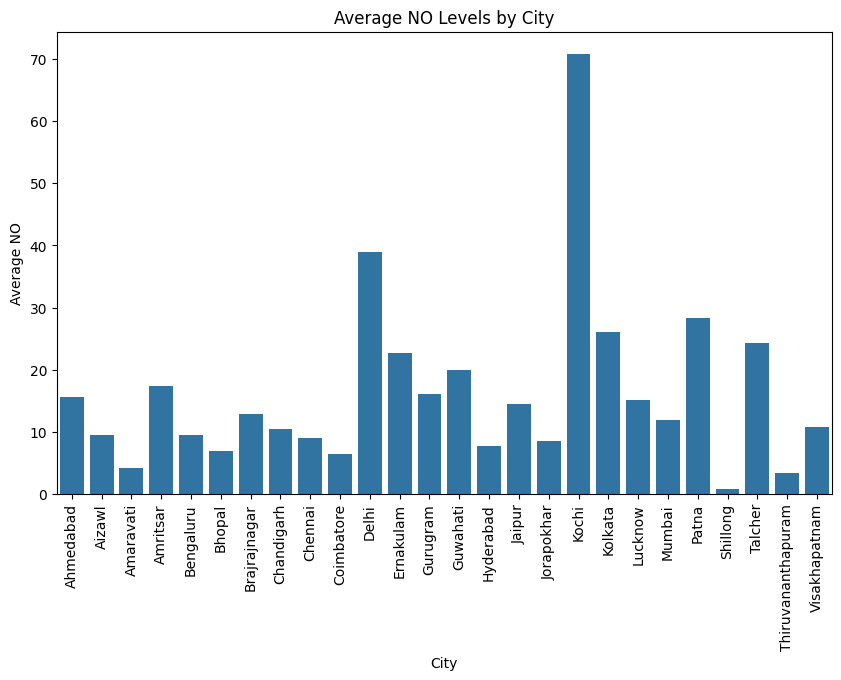

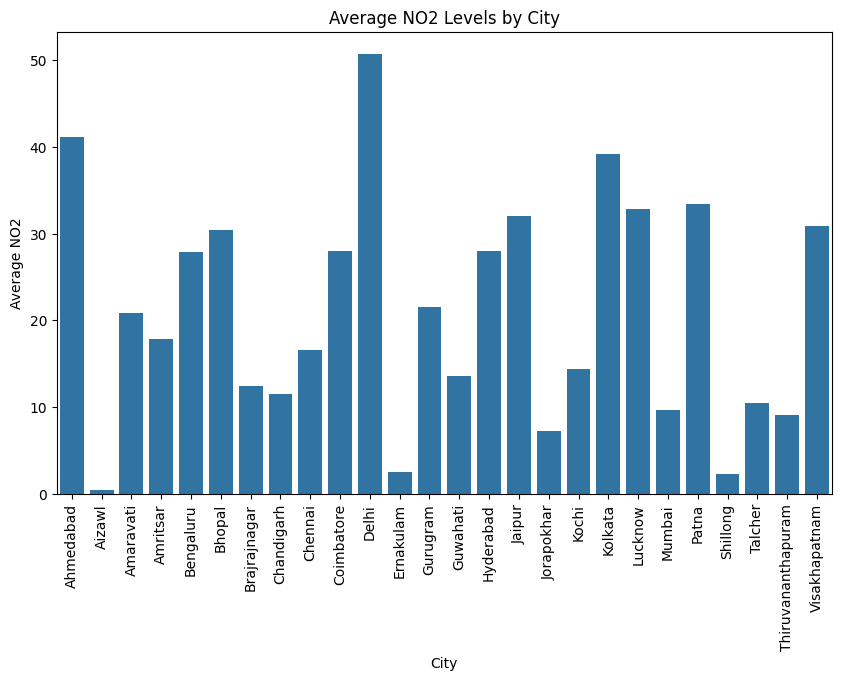

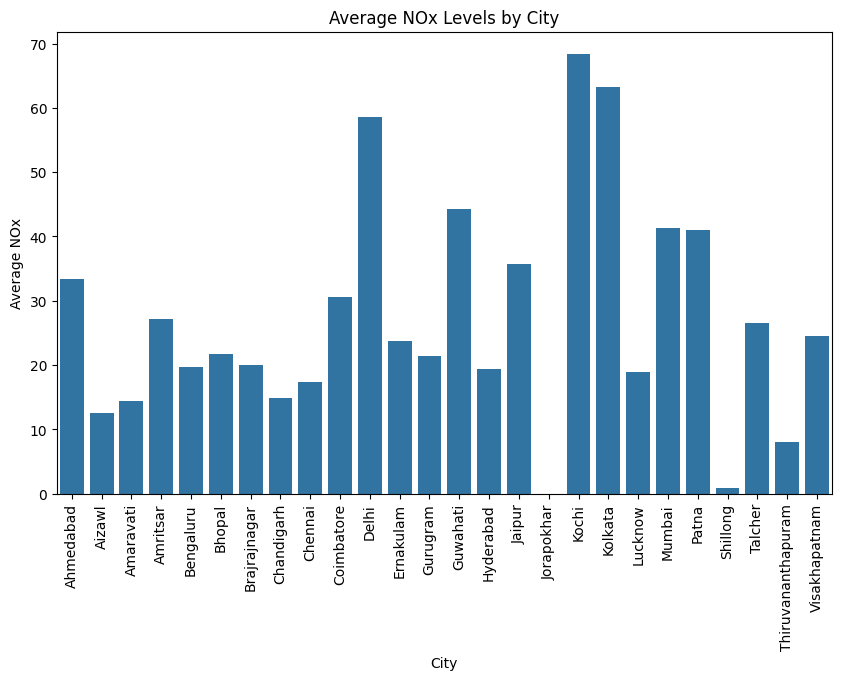

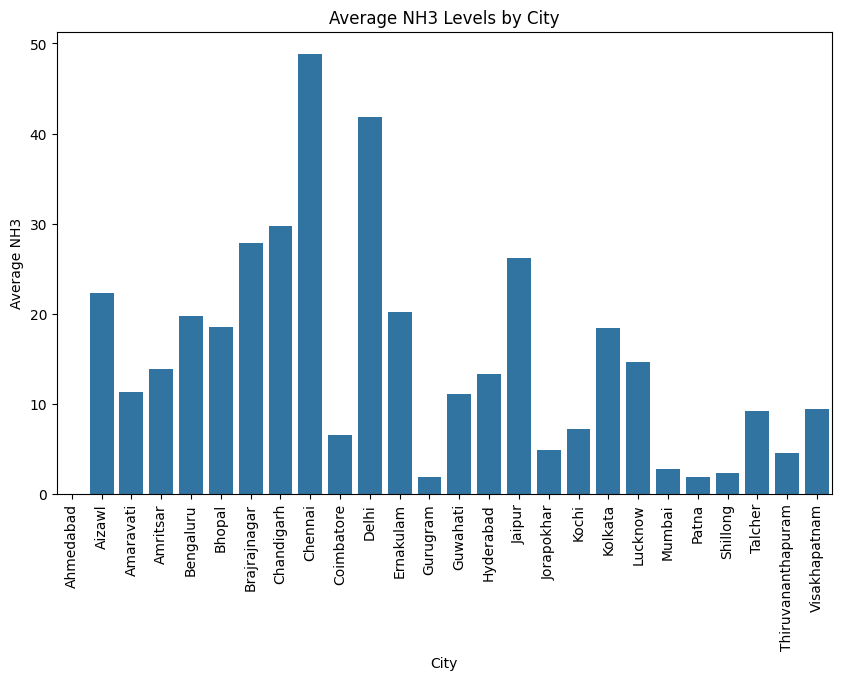

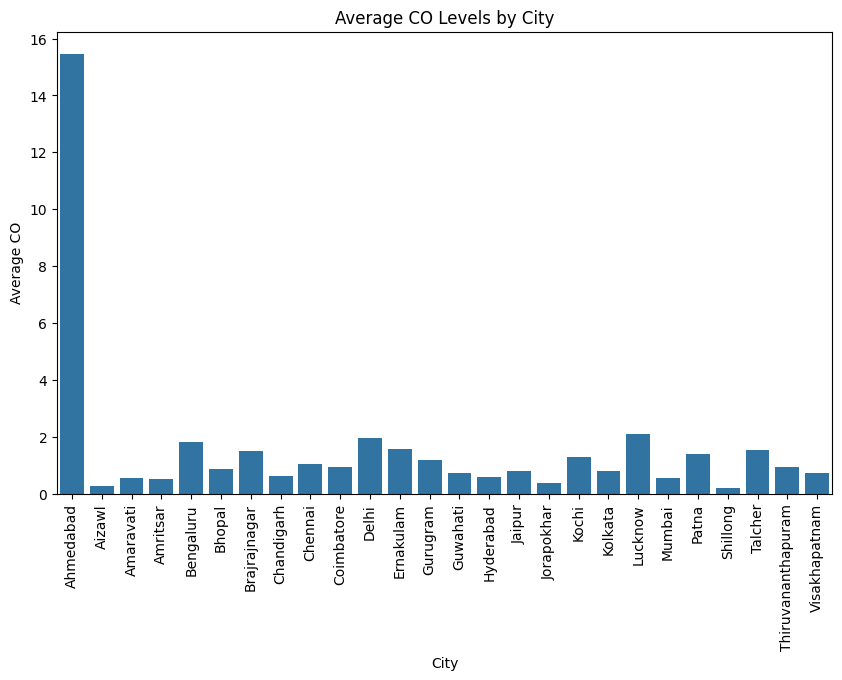

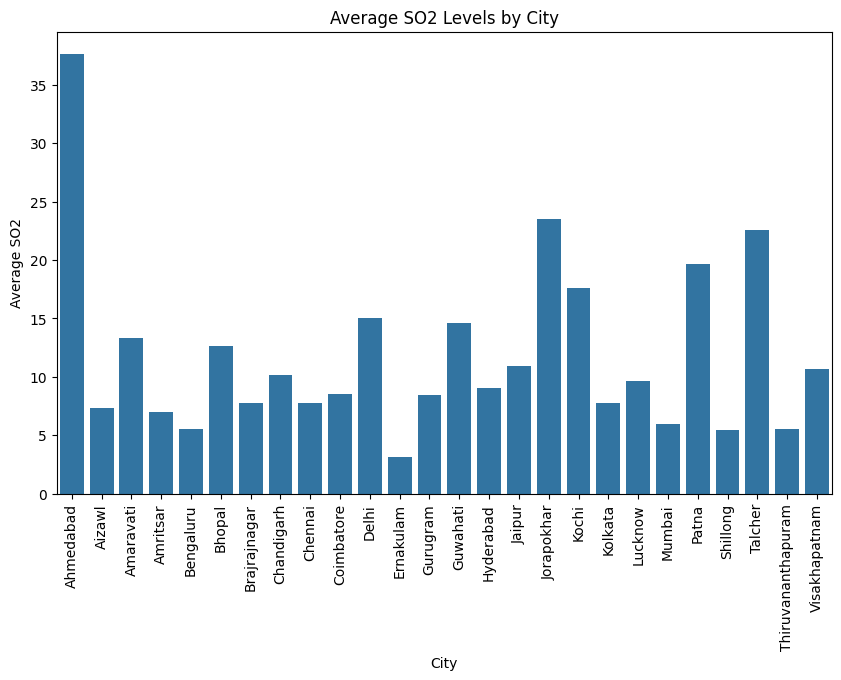

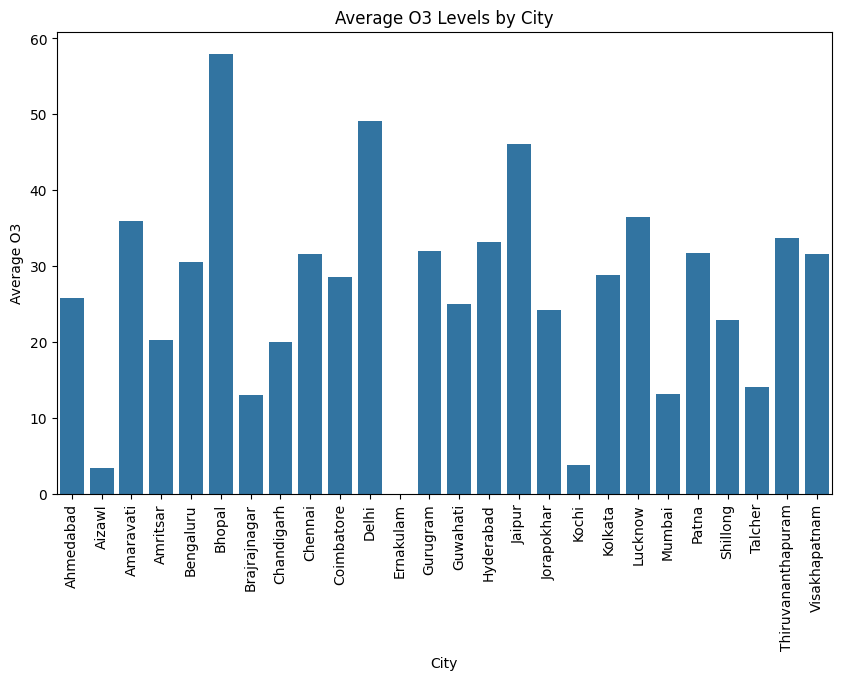

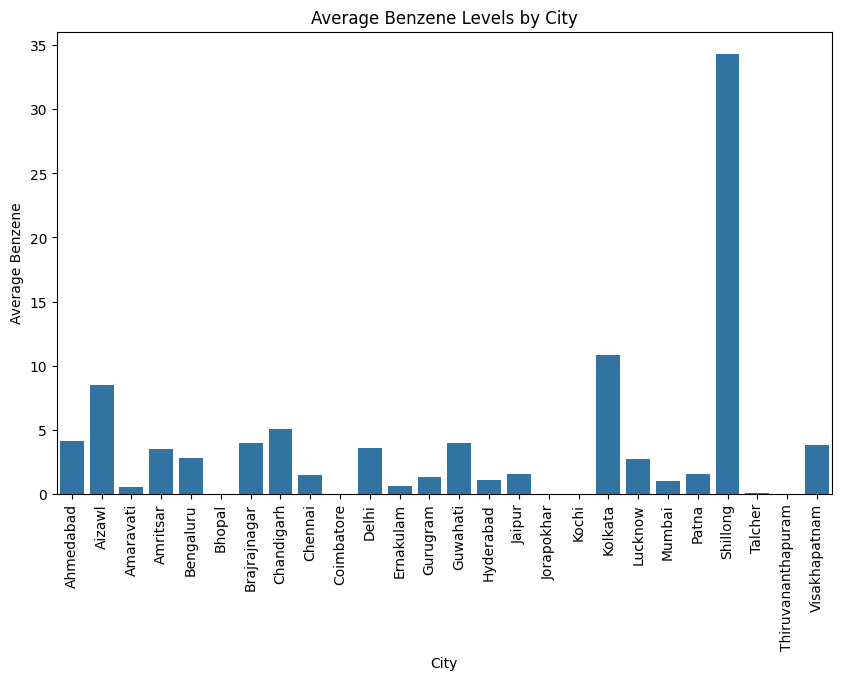

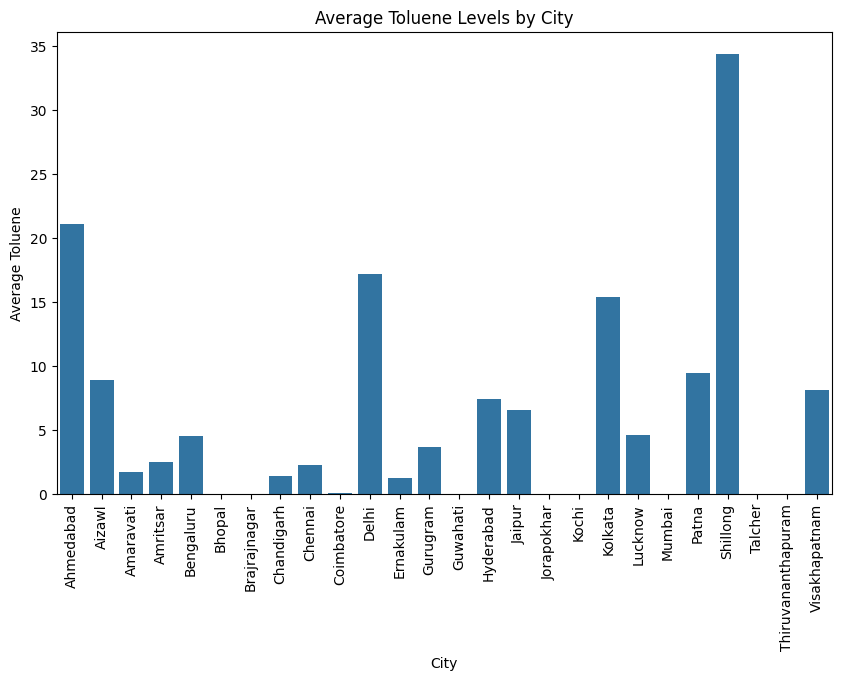

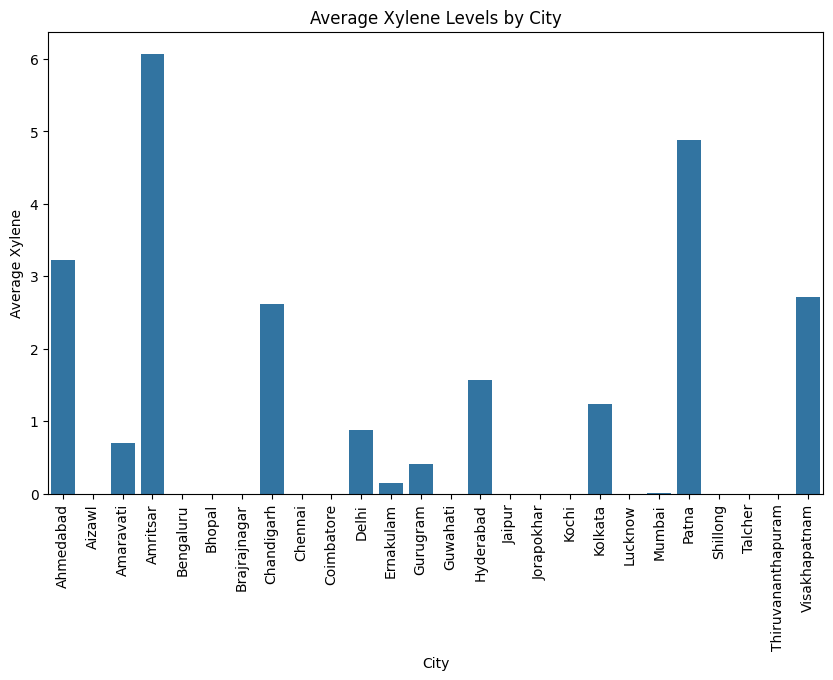

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Plot bar charts for average pollutant levels per city
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_pollutants_per_city, x='City', y=pollutant)
    plt.title(f'Average {pollutant} Levels by City')
    plt.xlabel('City')
    plt.ylabel(f'Average {pollutant}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['Month'] = df['Month'].map(month_map)

In [ ]:
df['Month']

,Month
0,Jan
1,Jan
2,Jan
3,Jan
4,Jan
...,...
29526,Jun
29527,Jun
29528,Jun
29529,Jun


In [ ]:
# Calculate the average AQI per month per city
average_aqi_per_month_city = df.groupby(['City', 'Month'])['AQI'].mean().reset_index()
average_aqi_per_month_city

,City,Month,AQI
0,Ahmedabad,Apr,250.727778
1,Ahmedabad,Aug,301.180645
2,Ahmedabad,Dec,266.148387
3,Ahmedabad,Feb,404.858824
4,Ahmedabad,Jan,285.903226
...,...,...,...
288,Visakhapatnam,Mar,99.677419
289,Visakhapatnam,May,63.951613
290,Visakhapatnam,Nov,113.141667
291,Visakhapatnam,Oct,80.145161


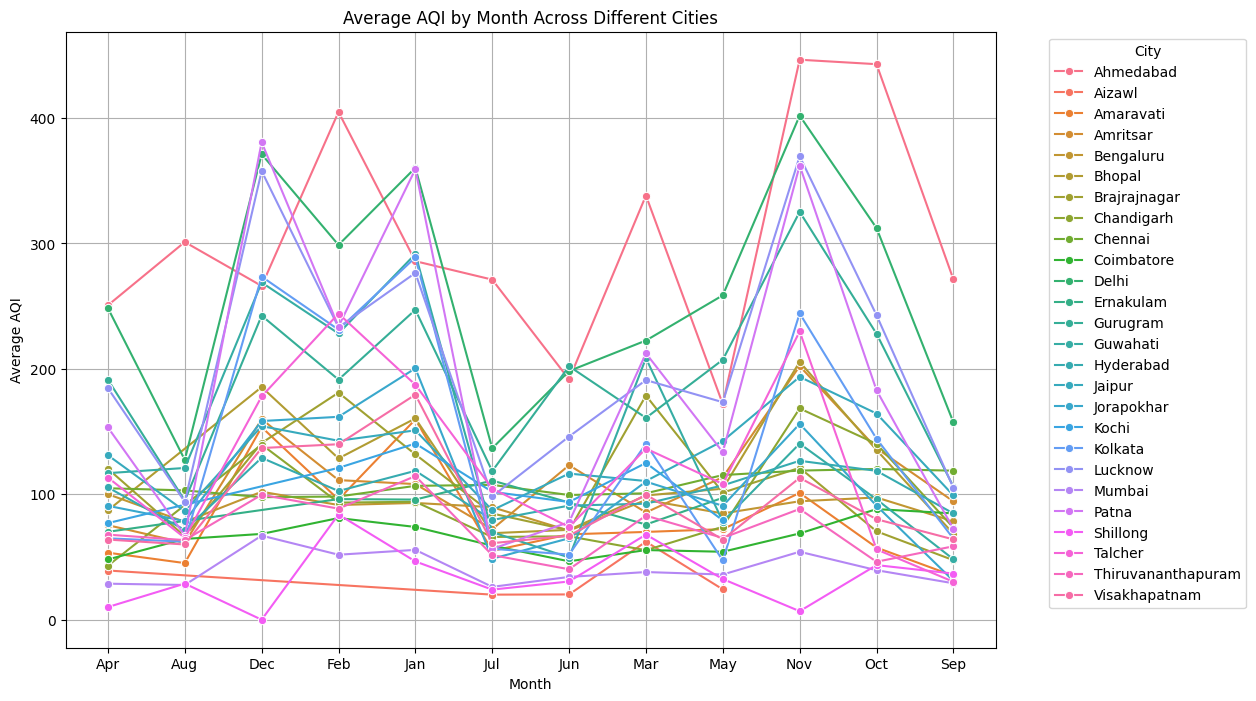

In [ ]:
# Plot line charts for average AQI per month for each city
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_aqi_per_month_city, x='Month', y='AQI', hue='City', marker='o')
plt.title('Average AQI by Month Across Different Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.grid(True)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[pollutants].corr()
correlation_matrix

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
PM2.5,1.000000,0.368414,0.469201,0.433199,0.382211,0.156542,0.112753,0.164249,0.287599,0.045836,0.167762,0.108134
PM10,0.368414,1.000000,0.404500,0.330189,0.382156,0.225860,-0.050369,0.148613,0.280985,0.042174,0.108695,0.016662
NO,0.469201,0.404500,1.000000,0.498892,0.737456,0.170952,0.233470,0.215860,0.120967,0.056948,0.170338,0.100570
NO2,0.433199,0.330189,0.498892,1.000000,0.592442,0.169636,0.369183,0.432338,0.393205,0.064258,0.330047,0.219805
NOx,0.382211,0.382156,0.737456,0.592442,1.000000,0.157394,0.244745,0.218174,0.165240,0.067660,0.208759,0.112985
NH3,0.156542,0.225860,0.170952,0.169636,0.157394,1.000000,-0.073566,-0.057805,0.150708,0.025507,0.019561,-0.052817
CO,0.112753,-0.050369,0.233470,0.369183,0.244745,-0.073566,1.000000,0.478023,0.071831,0.069523,0.290802,0.194980
SO2,0.164249,0.148613,0.215860,0.432338,0.218174,-0.057805,0.478023,1.000000,0.241047,0.049392,0.284870,0.266901
O3,0.287599,0.280985,0.120967,0.393205,0.165240,0.150708,0.071831,0.241047,1.000000,0.050669,0.175583,0.108790
Benzene,0.045836,0.042174,0.056948,0.064258,0.067660,0.025507,0.069523,0.049392,0.050669,1.000000,0.690560,0.096732


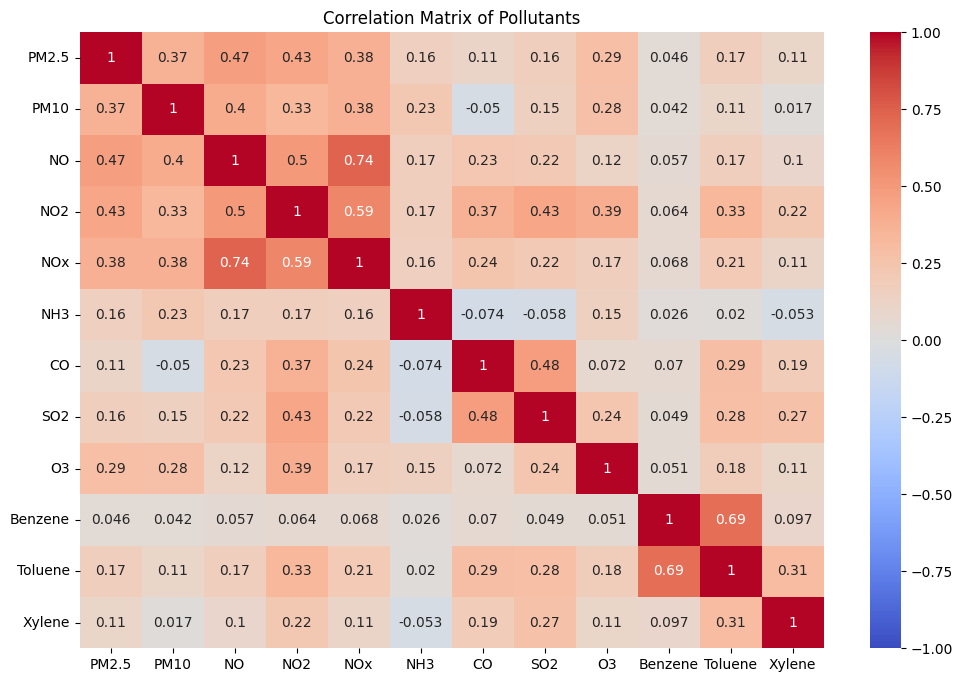

In [ ]:
# Plot a heatmap of the correlations between pollutants
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants')
plt.show()